In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import statistics
from scipy.stats import norm

In [2]:
df = pd.read_csv("Walmart.csv")

In [ ]:
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')

# *BASIC EXPLORATION* #

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
# Shape of Data
df.shape

(550068, 10)

In [6]:
# General info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Checking for missing values in the data
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [24]:
# Checking for duplicate values in the dataset
df.duplicated().sum()

0

There are no null values and no duplicate values in the dataset.

- Pre-processing dataset to make it more accessible

In [4]:
# Updating the Marital Status column values
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Single" if x==0 else "Married")

In [5]:
# Changing the data type of UserId to int32
df['User_ID'] = df["User_ID"].astype('int32')

In [6]:
# Changing the data type of Age to category
df['Age'] = df["Age"].astype('category')

In [7]:
# Changing the data type of Occupation to int8
df["Occupation"] = df["Occupation"].astype('int8')

In [8]:
# Changing the data type of City_Category to category
df['City_Category'] = df['City_Category'].astype('category')

In [9]:
# Changing the data type of Stay_years to category
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [10]:
# Changing the data type of Marital_Status to category
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [11]:
# Changing the data type of Product_Category to int8
df['Product_Category'] = df['Product_Category'].astype('int8')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


# *NON-GRAPHICAL ANALYSIS*

- Value Counts and Unique Attributes 

In [18]:
df['User_ID'].nunique()

5891

There are 5891 unique customers who purchased from Walmart on Black Friday.

In [19]:
df['Product_ID'].nunique()

3631

There are 3631 unique products that are available for purchase on Black Friday.

In [20]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

There are 75.31% male customers and 24.68% female customers who purchased from Walmart on Black Friday.

In [21]:
df_Age = pd.DataFrame(df['Age'].value_counts()).reset_index()
df_Age['proportion'] = np.round(df_Age['count'] / df_Age['count'].sum() * 100, 2)
df_Age['cumulative'] = df_Age['proportion'].cumsum()
df_Age

,Age,count,proportion,cumulative
0,26-35,219587,39.92,39.92
1,36-45,110013,20.00,59.92
2,18-25,99660,18.12,78.04
3,46-50,45701,8.31,86.35
4,51-55,38501,7.00,93.35
5,55+,21504,3.91,97.26
6,0-17,15102,2.75,100.01


The most number of purchases were done by customers of age group 26-35 making up roughly 40% of the total customers, followed by customers of age group 36-45 and 18-25. Customers belonging to only these three age groups make up about 78.04% of customer base.

In [22]:
df_occupation = pd.DataFrame(df['Occupation'].value_counts()).reset_index()
df_occupation['proportion'] = np.round(df_occupation['count'] / df_occupation['count'].sum() * 100, 2)
df_occupation['cumulative'] = df_occupation['proportion'].cumsum()
df_occupation

,Occupation,count,proportion,cumulative
0,4,72308,13.15,13.15
1,0,69638,12.66,25.81
2,7,59133,10.75,36.56
3,1,47426,8.62,45.18
4,17,40043,7.28,52.46
5,20,33562,6.10,58.56
6,12,31179,5.67,64.23
7,14,27309,4.96,69.19
8,2,26588,4.83,74.02
9,16,25371,4.61,78.63


We can observe from above data the number of customers who belong to a certain occupation. 90.10% of total purchases are made by people belonging to 13 out of 20 categories, i.e customers belonging to 4,0,7,1,17,20,12,14,2,16,6,3,10,5 in descending order of contribution.

In [23]:
df['City_Category'].value_counts(normalize=True)*100

City_Category
B    42.026259
C    31.118880
A    26.854862
Name: proportion, dtype: float64

From the available customer base, 42% customers hail from city B, 31.11% from city C and 26.85 % from city A.

In [24]:
df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

Stay_In_Current_City_Years
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: proportion, dtype: float64

We observe from above data that most purchases are done by customers who have been living in the city for 1-2 years, making up to 53.75% of total transactions.

In [25]:
df['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
Single     59.034701
Married    40.965299
Name: proportion, dtype: float64

Of the given database, 59.03% people are single and 40.96% people are married.

In [26]:
df_pc = pd.DataFrame(df['Product_Category'].value_counts()).reset_index()
df_pc['proportion'] = np.round(df_pc['count'] / df_pc['count'].sum() * 100, 2)
df_pc['cumulative'] = df_pc['proportion'].cumsum()
df_pc

,Product_Category,count,proportion,cumulative
0,5,150933,27.44,27.44
1,1,140378,25.52,52.96
2,8,113925,20.71,73.67
3,11,24287,4.42,78.09
4,2,23864,4.34,82.43
5,6,20466,3.72,86.15
6,3,20213,3.67,89.82
7,4,11753,2.14,91.96
8,16,9828,1.79,93.75
9,15,6290,1.14,94.89


From the given Product Categories in the data, we can deduce that 89.82% of purchases are  made from top 6 categories, namely 5, 1, 8, 11, 2, 6.

- Basic statistical overview of data 

In [27]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [28]:
df.describe(include=['object','category'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2
top,P00265242,M,26-35,B,1,Single
freq,1880,414259,219587,231173,193821,324731


**User_ID** : This column is a record of all the user Ids given to unique customers. In the dataset we have record of 550068 customers.

**Occupation** : This column indicates occupations of all the customers, and in the dataset occupations are masked by numbers ranging from 0-20.

**Product_Category** : It shows the category a product belongs to, and in the data the categories range from 1-20.

**Purchase** : Purchase column shows the amount of money customers spent on the product they bought.

**Product_ID** : It shows the unique ids for each product. There are  unique products out of which product with id P00265242 is the most bought, about 1880 times.

**Gender** : Shows the gender of the customers. It has two unique values, that is Male and Female.

**Age** : This column shows the ages of the customers, but in bins format. Most purchases are done by customers from age range of 26-35.

**City_Category** : It indicates the city that the customer belongs to. Out of all the cities, most customers, about 231173, are from city B.

**Stay_In_Current_City_Years** : This column shows the numbers of years a customer has lived in their respective city. About 193821 customers have lived in their current city for 1 year.

**Marital_Status** : It indicates whether the customers are married or single. According to the dataset, 324731 customers are single and others are married.

- Computing transactions and revenue generated with respect to Gender, Marital_Status, Age and City Categoties

In [29]:
# How many unique customers are there for each gender in the data who have made at least one transaction on Black Friday?
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [30]:
df.groupby('Gender')['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

Since each row in the data suggests transaction for 1 item, we observe that total 135809 transactions were made by females and 414259 transactions were made by males. Therefore, on an average, each male customer made 98.04 transactions and each female customer made 81.51 transactions.

In [31]:
# Total percentage revenue generated by each gender
gender_revenue_df = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_revenue_df['percent'] = np.round((gender_revenue_df['Purchase'] / gender_revenue_df['Purchase'].sum()) * 100, 2)
gender_revenue_df

,Gender,Purchase,percent
0,F,1186232642,23.28
1,M,3909580100,76.72


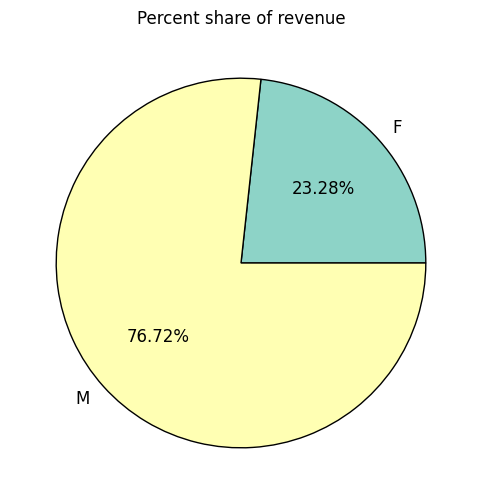

In [94]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set3")
plt.pie(x = gender_revenue_df['percent'], labels = gender_revenue_df['Gender'],autopct = '%.2f%%', colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'sans-serif', 'fontweight' : 100})
plt.title('Percent share of revenue')
plt.show()

Female customers contribute about 23.28% revenue and Male customers contribute to about 76.72% revenue.

In [33]:
# Average revenue generated by each customer based on gender 
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On an average, each female made a purchase of $8734 and each male made a purchase of $9437 on Black Friday. 

In [34]:
# How many unique customers are there for each Marital Status option in the data who have made at least one transaction on Black Friday?
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
Married    2474
Single     3417
Name: User_ID, dtype: int64

There are a 2474 married unique people and 3417 single unique people in the provided data.

In [35]:
df.groupby('Marital_Status')['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

Since each row in the data suggests transaction for 1 item, we observe that total 225337 transactions were made by Married customers and 324731 transactions were made by Single customers. Therefore, on an average, each married customer made 91.08 transactions and each single customer made 95.03 transactions.

In [36]:
# Total percentage revenue generated by each gender
marital_rev_df = df.groupby('Marital_Status')['Purchase'].sum().reset_index()
marital_rev_df['percent'] = np.round((marital_rev_df['Purchase'] / marital_rev_df['Purchase'].sum()) * 100, 2)
marital_rev_df

,Marital_Status,Purchase,percent
0,Married,2086885295,40.95
1,Single,3008927447,59.05


Married customers contribute about 40.95% revenue and Single customers contribute to about 59.05% revenue

In [37]:
# Average revenue generated by each customer based on gender 
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
Married    9261.174574
Single     9265.907619
Name: Purchase, dtype: float64

On an average, each married customer made a purchase of $9261 and each single customer made a purchase of $9265 on Black Friday.

In [38]:
# To further evaluate the revenue generated based on both gender and marital status to provide more insights.
marital_rev_df = df.groupby(['Marital_Status','Gender'])['Purchase'].sum().reset_index()
marital_rev_df['percent'] = np.round((marital_rev_df['Purchase'] / marital_rev_df['Purchase'].sum()) * 100, 2)
marital_rev_df

,Marital_Status,Gender,Purchase,percent
0,Married,F,502078515,9.85
1,Married,M,1584806780,31.10
2,Single,F,684154127,13.43
3,Single,M,2324773320,45.62


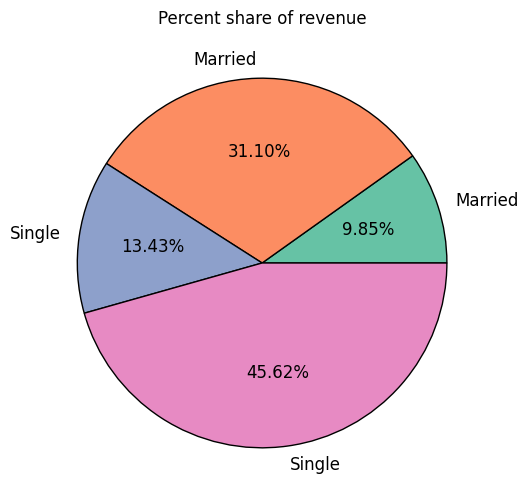

In [92]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = marital_rev_df['percent'], labels = marital_rev_df['Marital_Status'],autopct = '%.2f%%',colors=colors,
        wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'sans-serif', 'fontweight' : 400})
plt.title('Percent share of revenue')
plt.show()

We can infer from above data that Single Males contribute the most to the total revenue (45.62%) and married females contribute the least (9.85%)

In [40]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [59]:
agedf = pd.DataFrame(df.groupby('Age')['User_ID'].count()).reset_index().rename(columns = {'User_ID' : 'total_transactions'}).sort_values(by = 'total_transactions', ascending = False)
Agedf = pd.DataFrame(df.groupby('Age')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
Age_df = agedf.merge(Agedf)
Age_df['percent'] =  np.round(Age_df['unique_customers'] / Age_df['unique_customers'].sum() * 100, 2)
Age_df['cumulative'] = Age_df['percent'].cumsum()
Age_df

,Age,total_transactions,unique_customers,percent,cumulative
0,26-35,219587,2053,34.85,34.85
1,36-45,110013,1167,19.81,54.66
2,18-25,99660,1069,18.15,72.81
3,46-50,45701,531,9.01,81.82
4,51-55,38501,481,8.16,89.98
5,55+,21504,372,6.31,96.29
6,0-17,15102,218,3.70,99.99


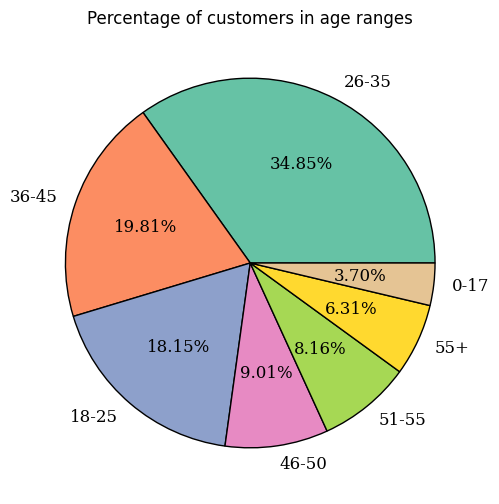

In [91]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = Age_df['percent'], labels = Age_df['Age'],autopct = '%.2f%%',colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Percentage of customers in age ranges')
plt.show()

Majority of the transactions are made by the customers between 26 and 45 years of age. About 81.82% of the total transactions are made by customers of age between 18 and 50 years.

In [67]:
Age_rev_df = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).reset_index().sort_values(by = 'Purchase', ascending = False)
Age_rev_df['percent'] = np.round((Age_rev_df['Purchase'] / Age_rev_df['Purchase'].sum()) * 100, 2)
Age_rev_df['cumulative'] = Age_rev_df['percent'].cumsum()
Age_rev_df

,index,Age,Purchase,percent,cumulative
2,2,26-35,2031770578,39.87,39.87
3,3,36-45,1026569884,20.15,60.02
1,1,18-25,913848675,17.93,77.95
4,4,46-50,420843403,8.26,86.21
5,5,51-55,367099644,7.20,93.41
6,6,55+,200767375,3.94,97.35
0,0,0-17,134913183,2.65,100.00


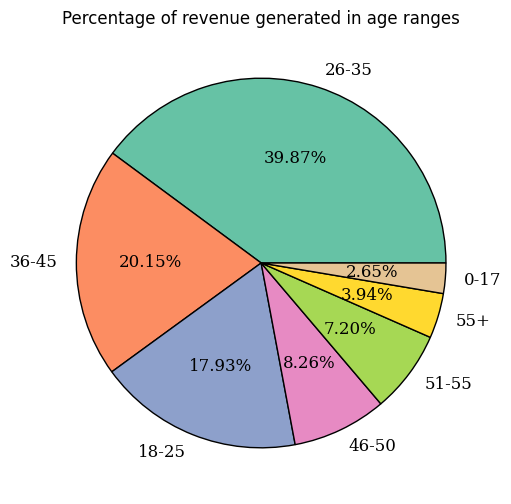

In [90]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set2")
plt.pie(x = Age_rev_df['percent'], labels = Age_rev_df['Age'],autopct = '%.2f%%',colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Percentage of revenue generated in age ranges')
plt.show()

Up to 77.95% of the total revenue is generated from the age categories ranging from 18 to 35.

In [50]:
# Total no. of transactions from each city categories
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [57]:
city = pd.DataFrame(df.groupby('City_Category')['User_ID'].count()).reset_index().rename(columns = {'User_ID' : 'total_transactions'})
citydf = pd.DataFrame(df.groupby('City_Category')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
City_df = city.merge(citydf)
City_df['percent'] =  np.round(City_df['unique_customers'] / City_df['unique_customers'].sum() * 100, 2)
City_df

,City_Category,total_transactions,unique_customers,percent
0,A,147720,1045,17.74
1,B,231173,1707,28.98
2,C,171175,3139,53.28


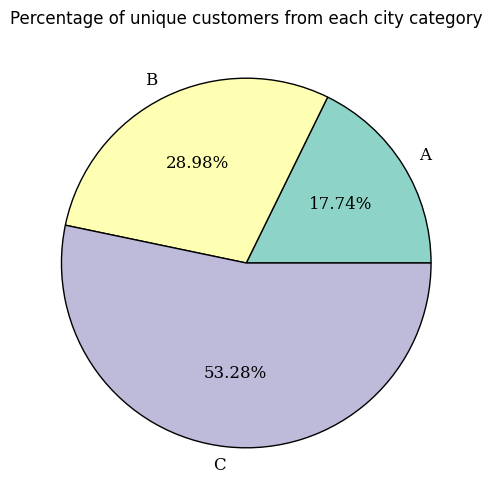

In [87]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set3")
plt.pie(x = City_df['percent'], labels = City_df['City_Category'],autopct = '%.2f%%',colors=colors,
       wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
       textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Percentage of unique customers from each city category')
plt.show()

We can observe that city category C has most unique number of customers, making up 53.28% of the total data. But city category B has the most number of transactions as observed.

In [65]:
city_rev_df = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
city_rev_df['percent'] = np.round((city_rev_df['Purchase'] / city_rev_df['Purchase'].sum()) * 100, 2)
city_rev_df

,City_Category,Purchase,percent
0,B,2115533605,41.52
1,C,1663807476,32.65
2,A,1316471661,25.83


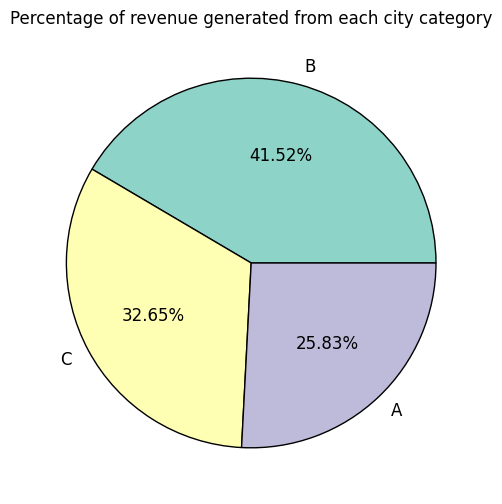

In [86]:
plt.figure(figsize = (8,6))
colors = sns.color_palette("Set3")
plt.pie(x = city_rev_df['percent'], labels = city_rev_df['City_Category'],autopct = '%.2f%%',colors=colors,
        wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True},
        textprops = {'fontsize' : 12, 'fontfamily' : 'sans-serif', 'fontweight' : 100})
plt.title('Percentage of revenue generated from each city category')
plt.show()

We can observe that customers from city B contributes most to the total revenue (41.52%) followed by city C with 32.65%

# *VISUAL ANALYSIS* #

- UNIVARIATE ANALYSIS

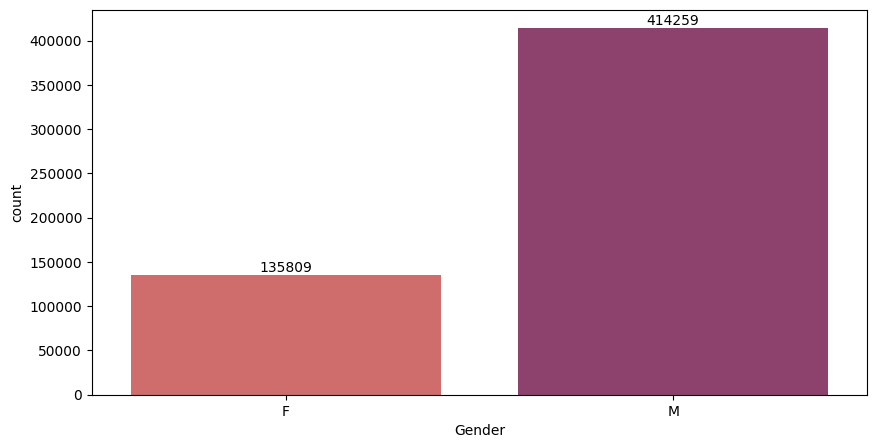

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Gender'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

There are 414259 Male customers and 135809 female customers

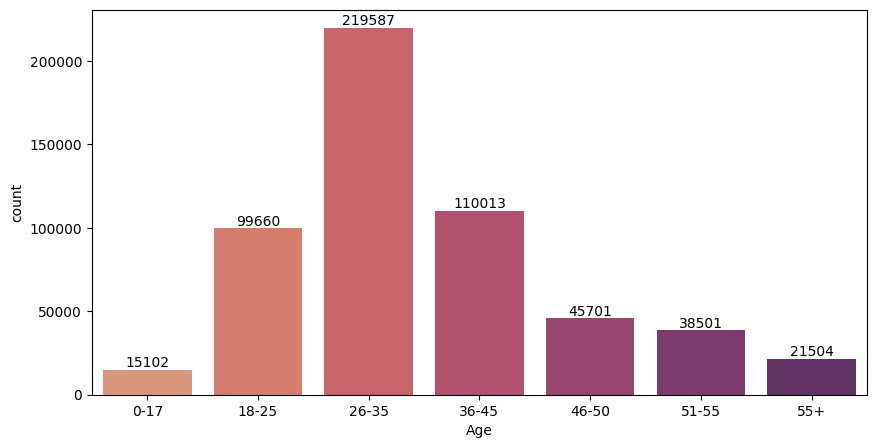

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Age'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

Majority of customers are from 26-35 age group i.e 219587 customers.

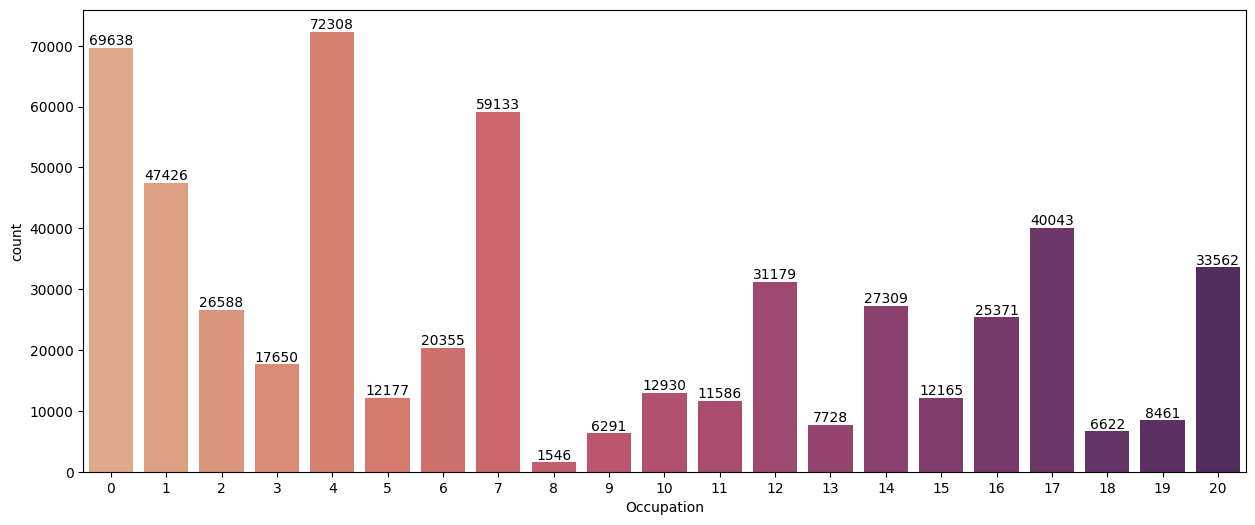

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x=df['Occupation'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

The top 5 occupations that most Walmart customers are grouped under are 4, 0, 7, 1 and 17

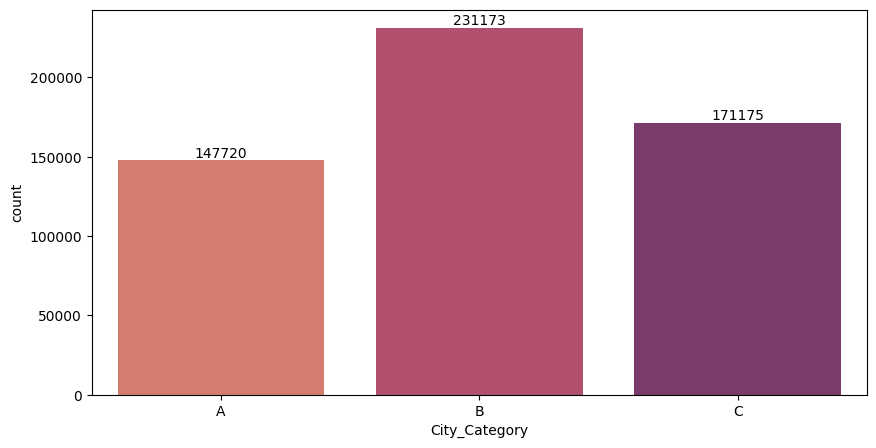

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['City_Category'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

Majority transactions were made by customers from city category B.

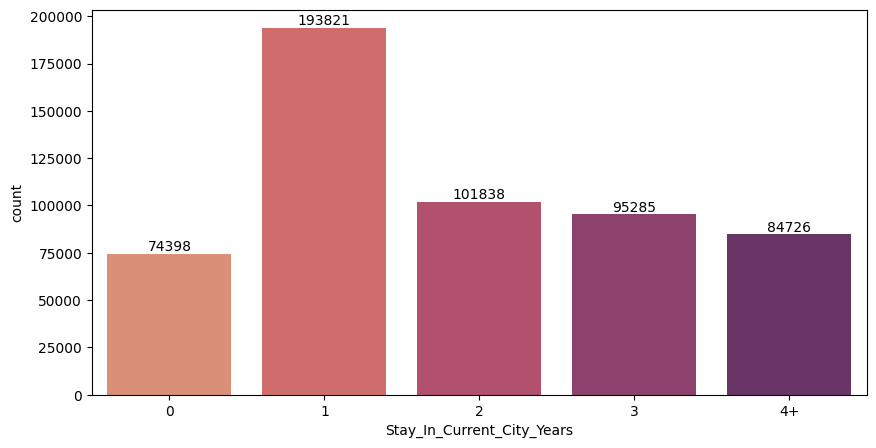

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Stay_In_Current_City_Years'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

Most transactions are made by customers who have been living in their current city for 1 year.

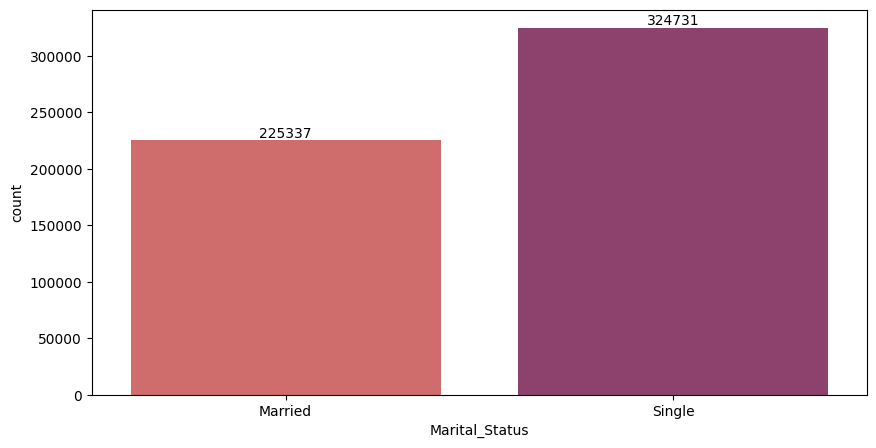

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Marital_Status'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

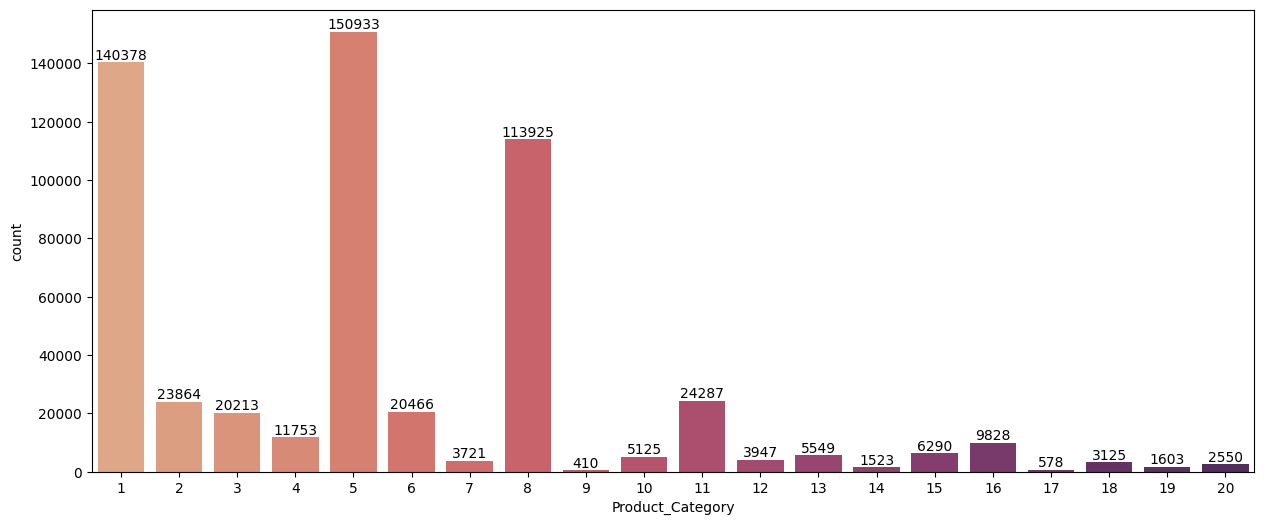

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x=df['Product_Category'],palette='flare')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
plt.show()

Top 5 product categories with most transactions are 5, 1, 8, 11 and 2

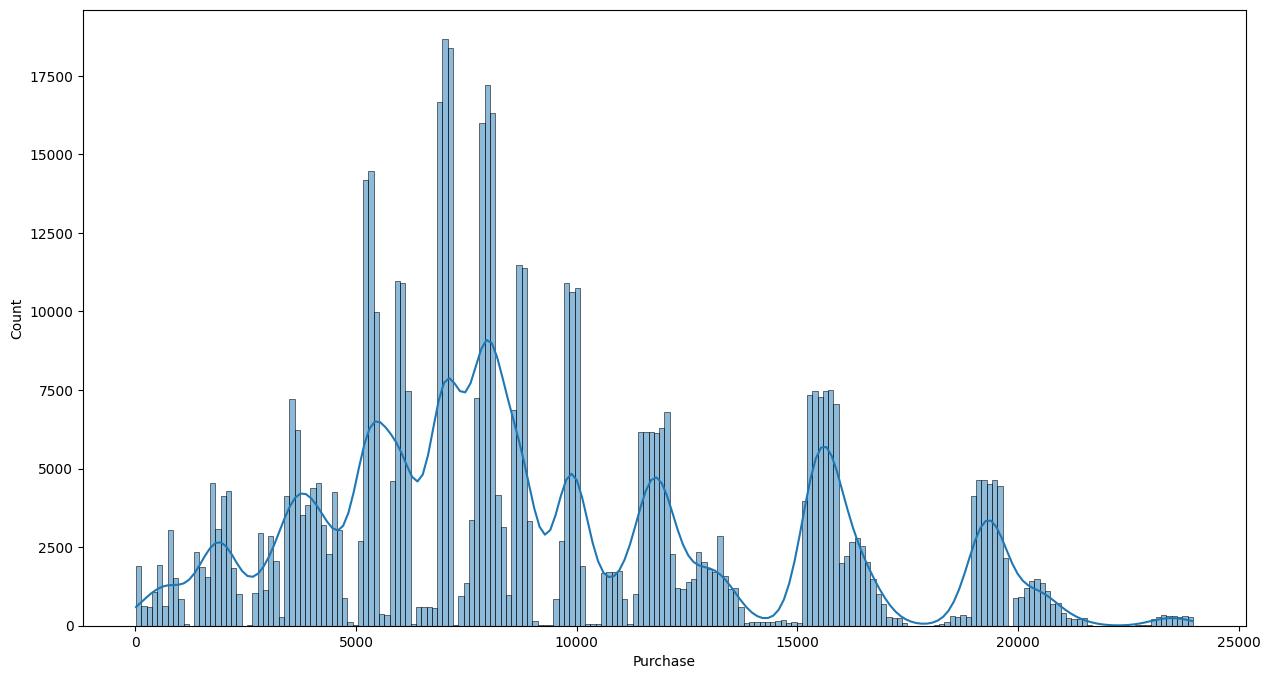

In [95]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'Purchase', kde = True, bins = 200)
plt.show()

- DETECTING OUTLIERS

<Axes: xlabel='Gender', ylabel='Purchase'>

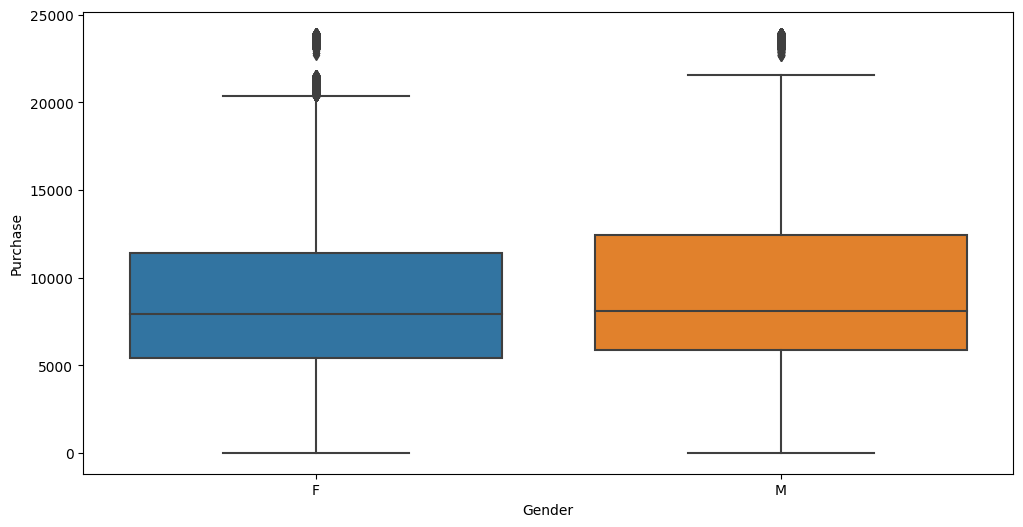

In [17]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Gender',y = 'Purchase')

<Axes: xlabel='Age', ylabel='Purchase'>

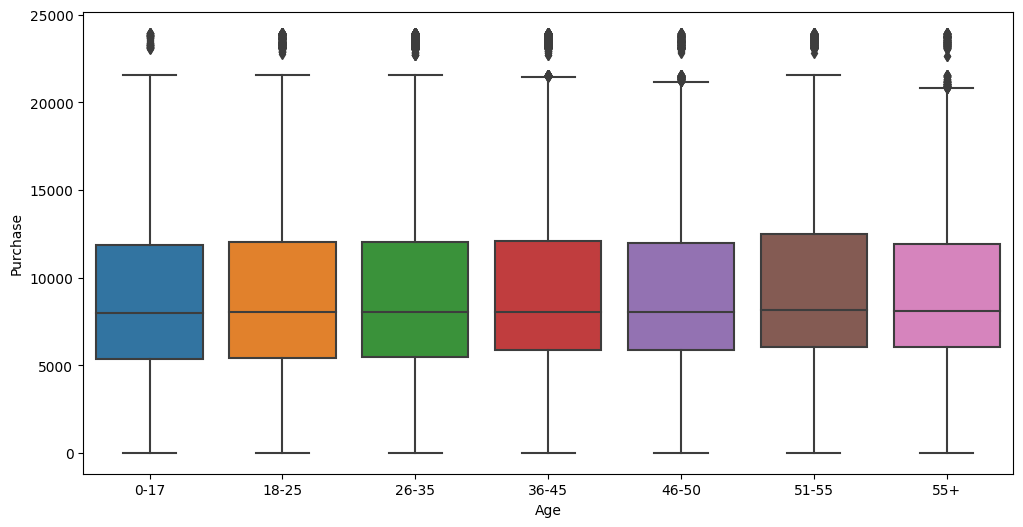

In [18]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Age',y = 'Purchase')

<Axes: xlabel='City_Category', ylabel='Purchase'>

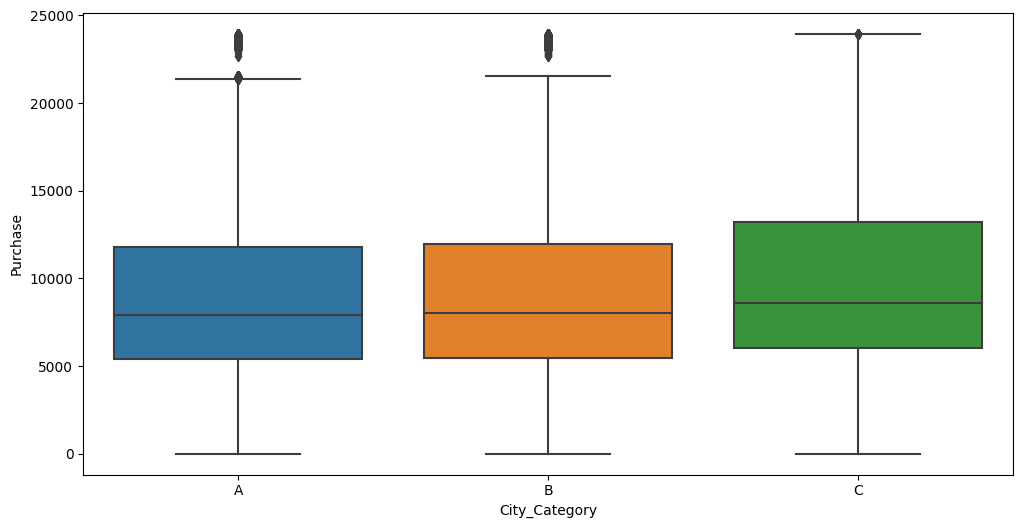

In [19]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category',y = 'Purchase')

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

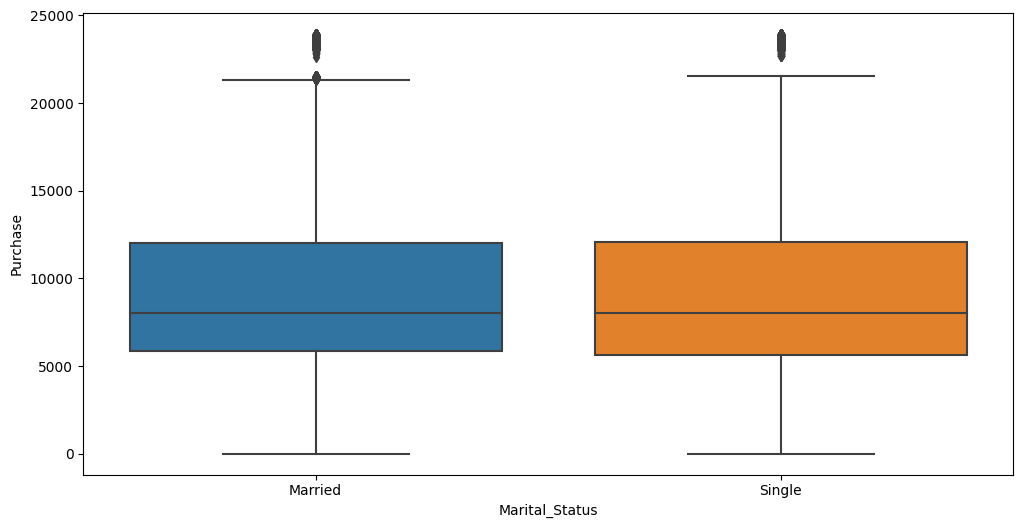

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Marital_Status',y = 'Purchase')

- BIVARIATE ANALYSIS

<Axes: xlabel='Age', ylabel='Purchase'>

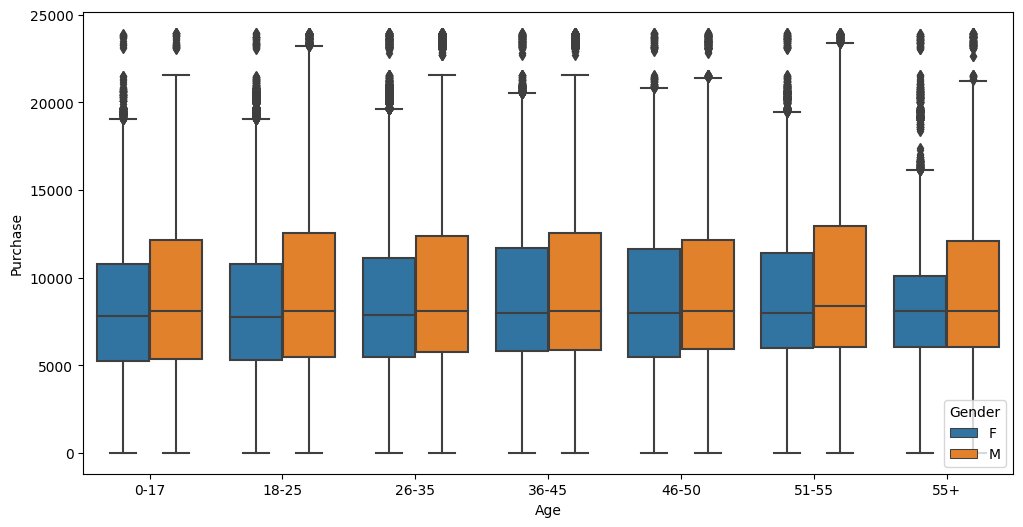

In [102]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')

<Axes: xlabel='City_Category', ylabel='Purchase'>

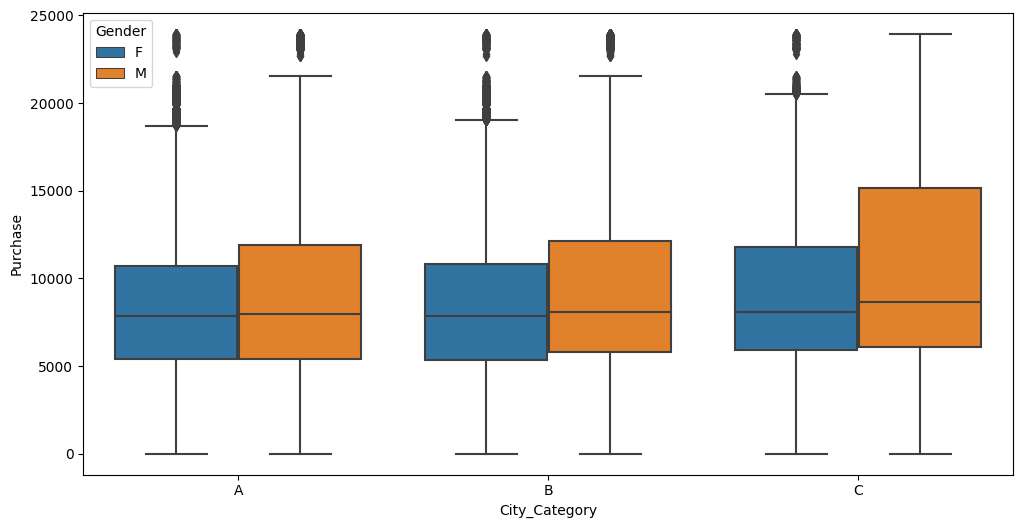

In [103]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender')

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

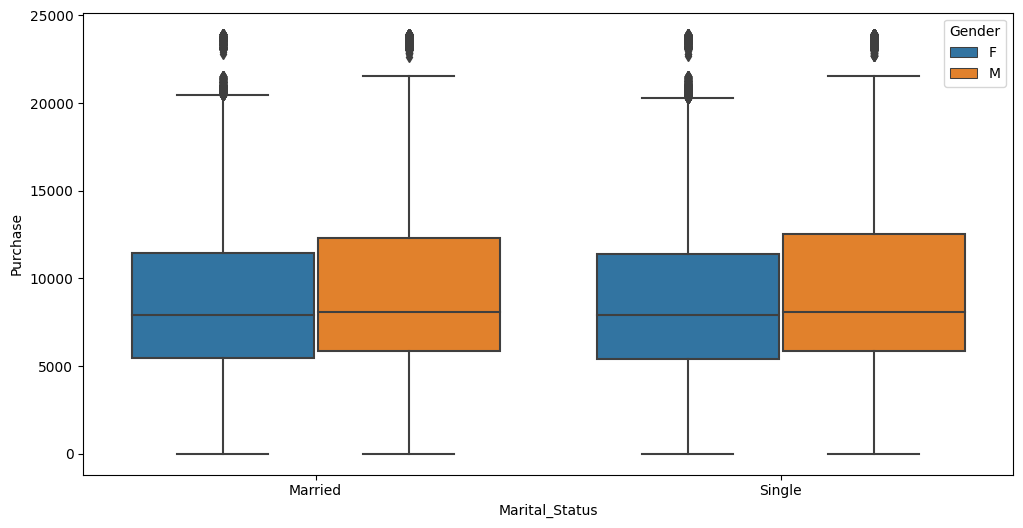

In [105]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender')

<Axes: xlabel='Age', ylabel='Purchase'>

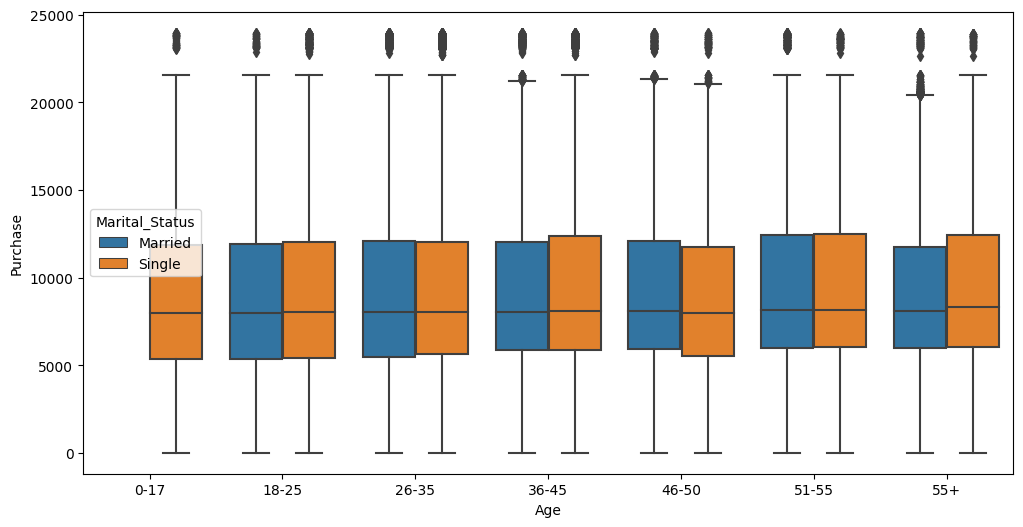

In [13]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Marital_Status')

<Axes: xlabel='City_Category', ylabel='Purchase'>

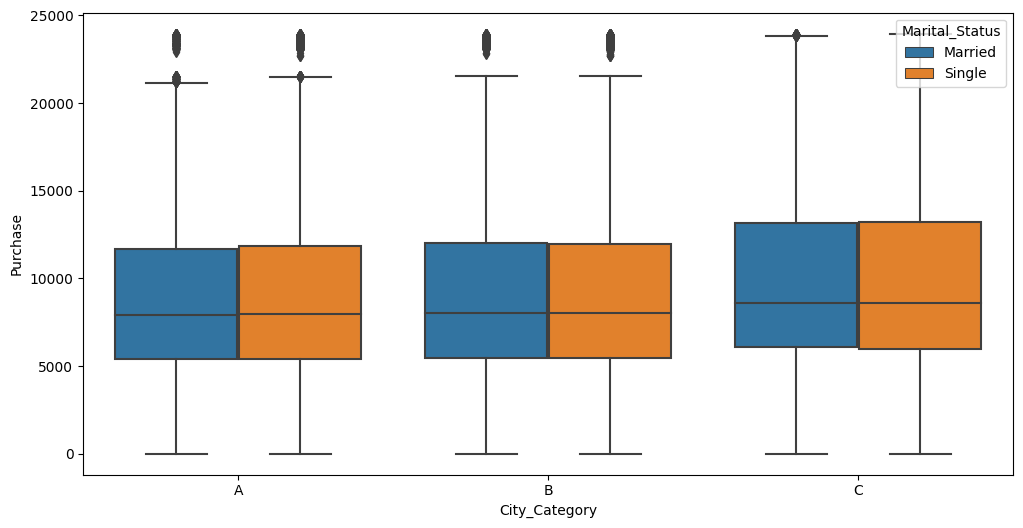

In [14]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Marital_Status')

In [131]:
male_df = df.loc[df['Gender']=='M']
female_df = df.loc[df['Gender']=='F']


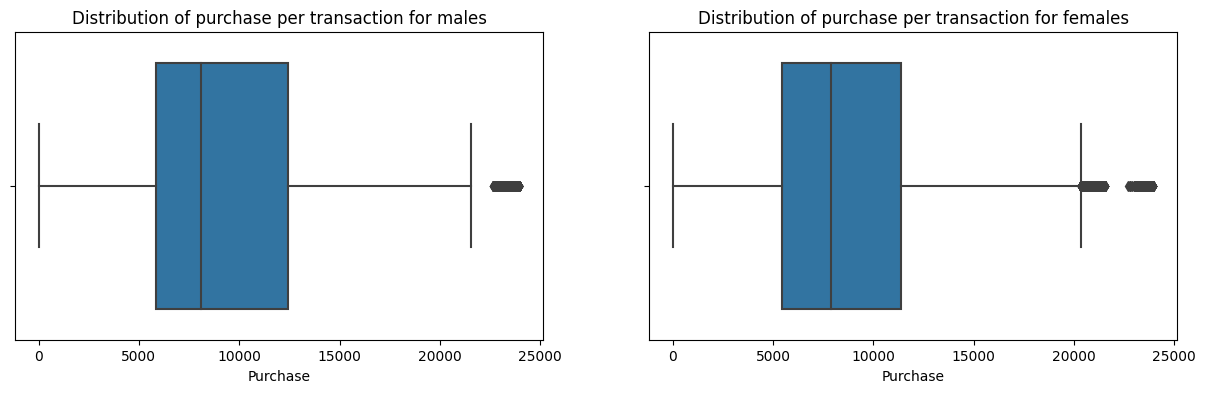

In [132]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = male_df, x = 'Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = female_df, x = 'Purchase')
plt.show()

In [143]:
marital_df = df.loc[df['Marital_Status']=='Married']
single_df = df.loc[df['Marital_Status']=='Single']

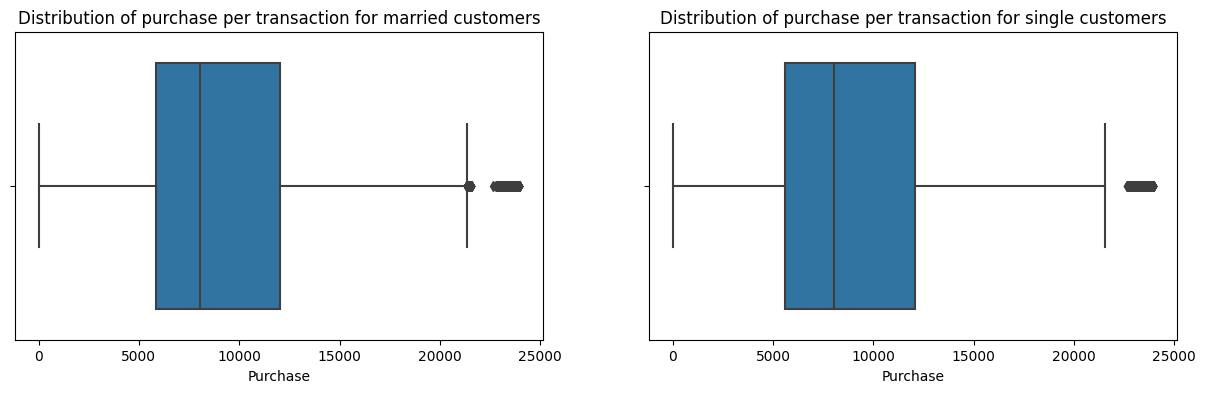

In [145]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for married customers')
sns.boxplot(data = marital_df, x = 'Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for single customers')
sns.boxplot(data = single_df, x = 'Purchase')
plt.show()

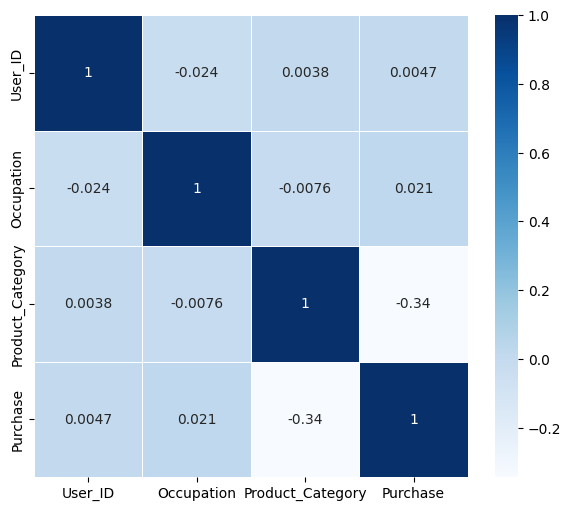

In [37]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True, linewidths=0.5)
plt.show()

# FINAL INSIGHTS #

- The dataset includes 1666 unique female customers and 4225 unique male customers. On average, each male conducts 98 transactions on Black Friday, while females conduct 82.
- Males contribute to 76.72% of the total revenue generated.
- The average total purchase amount per male customer on Black Friday is $925,438.92, whereas for females it is $712,269.56.
- Among 5891 unique customers, 42% are married and 58% are single.
- On average, married customers make 91 transactions, while single customers make 95 transactions.
- Married customers have an average total purchase of $843,469.79 on Black Friday, while single customers spend approximately $880,526.31.
- Approximately 59.05% of the total revenue comes from single customers.
- The majority of transactions originate from customers aged between 26 and 45 years.
- Roughly 81.82% of total transactions are conducted by customers aged between 18 and 50 years.
- Around 81.82% of total unique customers fall within the age range of 18 to 50 years.
- Among all unique customers, 35.85% belong to the age group of 26-35 years, 19.81% to 36-45 years, 18.15% to 18-25 years, and 9.01% to 46-50 years.
- Walmart generates 86.21% of total revenue from customers aged 18 to 50 years on Black Friday.
- Customers associated with 11 specific occupations (4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6) account for 82.33% of the total transactions, in descending order.
- The majority of transactions (53.75% of total transactions) are performed by customers who have resided in their current city for 1 or 2 years.
- Approximately 82.43% of the total transactions are attributed to just 5 Product Categories: 5, 1, 8, 11, and 2.
- Distribution of revenue by age group: 39.87% from 26-35 years, 20.15% from 36-45 years, 17.93% from 18-25 years, and 8.26% from 46-50 years.
- The majority of total unique customers belong to City C, accounting for 82.26% alongside City B.
- Walmart garners 41.52% of total revenue from City B customers, 32.65% from City C, and 25.83% from City A on Black Friday.
- The top 5 product categories (1, 5, 8, 6, and 2) contribute to 84.36% of the total revenue on Black Friday.


# BUSINESS RECOMMENDATIONS #

- Since the majority of transactions originate from males, it's advantageous to customize marketing approaches to align with their preferences and requirements. This might encompass targeted promotions, product assortments, or advertising initiatives aimed at attracting male clientele.

- Efforts should be directed towards devising marketing strategies aimed at appealing to a larger female customer base. It is imperative to conduct an in-depth analysis of the product categories most favored by female customers, followed by the implementation of suitable measures such as introducing novel products, offering related product deals, and providing exclusive discounts.

- Given that 82.33% of transactions stem from customers in 11 specific occupations, directing marketing endeavors towards these occupational groups could prove strategic. Understanding the preferences and needs of individuals within these occupations aids in crafting precise marketing campaigns and tailor-made incentives.

- As single customers contribute 59.05% of total revenue, focusing on catering to their desires and inclinations can drive heightened sales. Gaining insights into their motivations and creating personalized offerings can enhance their shopping experience and brand allegiance.

- Employ targeted marketing initiatives and communication strategies to consistently engage customers. This might involve personalized email campaigns, interactive social media content, and special promotions geared toward different customer segments. Regularly updating customers on new products, offers, and events can heighten engagement and foster more purchases.

-  Identifying high-spending customers, whether male or from specific age groups, allows for targeted marketing and exclusive incentives. Providing special discounts, loyalty rewards, or unique privileges can encourage recurring purchases and heighten customer satisfaction.

- With over half (53.75%) of transactions coming from recent city residents, this presents an opportunity to engage with this demographic. Introducing targeted marketing, welcoming perks, and enticements for newcomers can foster loyalty and amplify spending.

- Analyzing popular product categories can unveil opportunities for expanding product diversity within those segments. This can attract new customers and drive sales. Additionally, identifying complementary products or cross-selling avenues can stimulate additional purchases.

-  Introducing a loyalty program featuring rewards, incentives, and exclusive offers can encourage repeat purchases and bolster customer retention. Customized loyalty initiatives can be tailored for male customers, singles, and specific age brackets.

- Leveraging seasonal events, holidays, and special occasions for targeted promotions and discounts can create urgency and stimulate sales. Aligning marketing campaigns and product offerings with these events can drive conversion rates.

- Actively seeking customer feedback to comprehend preferences, concerns, and suggestions for enhancement is crucial. Encouraging reviews and ratings to build social credibility is vital. Utilizing this feedback to make improvements and refine the customer journey is essential.